In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [4]:
df = pd.read_csv('googleplaystore_user_reviews.csv')

In [5]:
df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


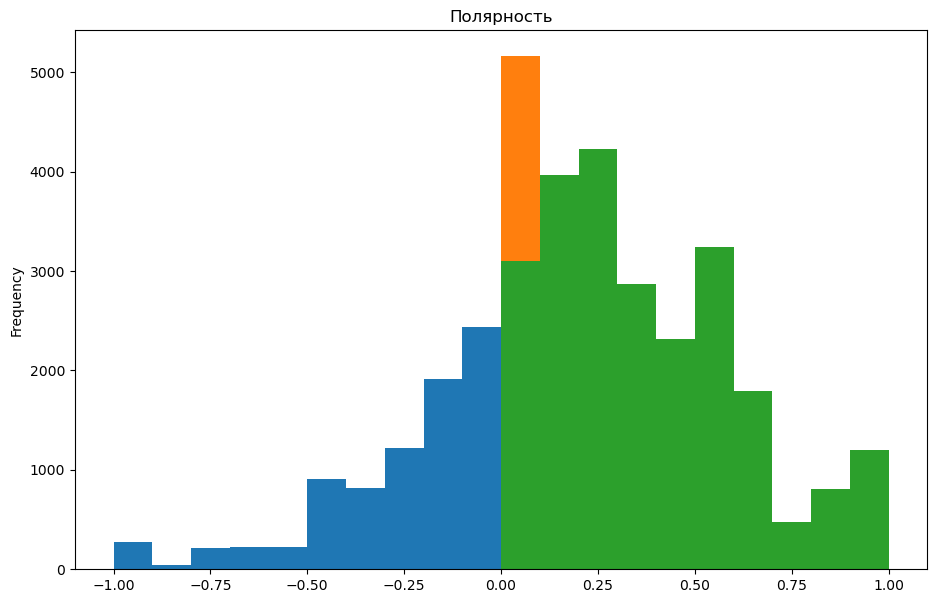

In [47]:
sent_positive = df['Sentiment_Polarity'].groupby(df['Sentiment']).plot(kind='hist',title='Распределение полярности отзывов')
"""Мы видим, что чаще всего встречаются нейтральные отзывы, а  положительные, как и резко отрицательные режею Но если сравнивать между собой положительные и отрицательные, то положительные отзывы пользователи оставляют чаще """

In [46]:
df2 = pd.read_csv('googleplaystore.csv')
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [33]:

df2['Reviews'].unique()
df2['Reviews'] = df2['Reviews'].replace('3.0M', np.NaN)
df2['Reviews'] = df2['Reviews'].astype('Int64')

In [31]:
rating_by_genres = df2['Rating'].groupby(df2['Genres']).mean()

In [34]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  Int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: Int64(1), float64(1), object(11)
memory usage: 1.1+ MB


In [35]:
rating_by_genres.head()

Genres
Action                          4.285475
Action;Action & Adventure       4.311765
Adventure                       4.180822
Adventure;Action & Adventure    4.423077
Adventure;Brain Games           4.600000
Name: Rating, dtype: float64

'Жанр Brain games имеет наиболее высокий рейтинг, наименее высркий у жанра Adventure'

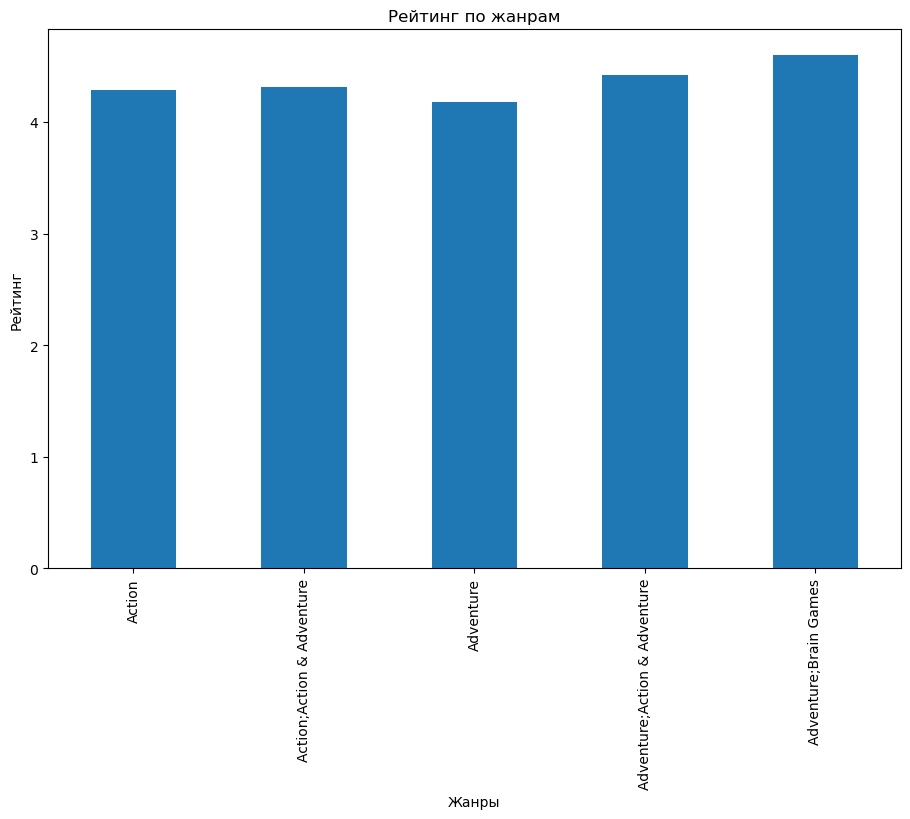

In [36]:
rating_by_genres.loc[['Action','Action;Action & Adventure','Adventure',
                      'Adventure;Action & Adventure', 'Adventure;Brain Games']].plot(kind='bar', 
                                                                                     title='Рейтинг по жанрам',
                                                                                     xlabel='Жанры',
                                                                                     ylabel='Рейтинг')
"""Жанр Brain games имеет наиболее высокий рейтинг, наименее высркий у жанра Adventure"""


'Можно увидеть, что самое большое распределение оценок в играх для всех ворастных категорийб что логично. Пользователи игр 18+ ставят оценки выше '

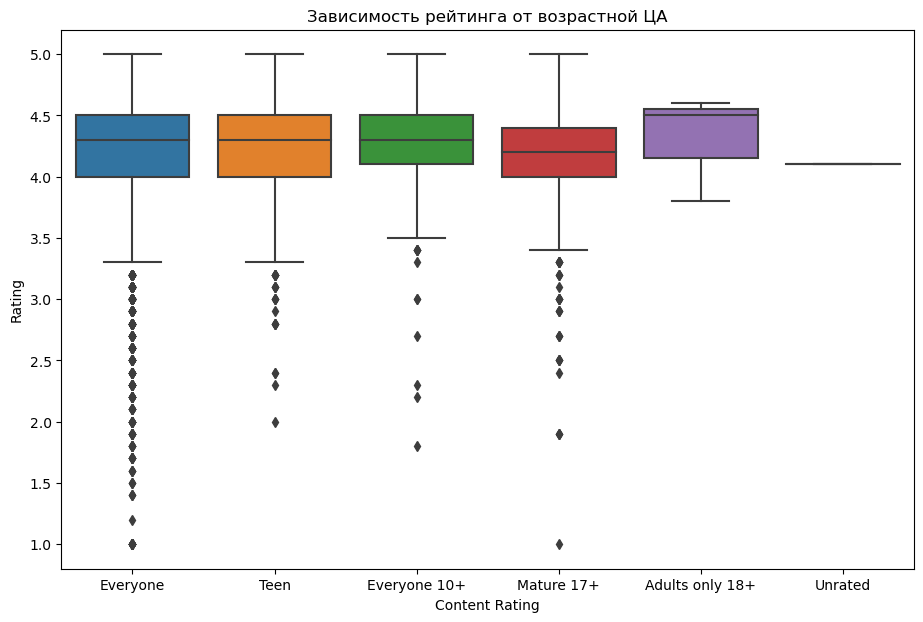

In [37]:
rating_by_content = df2['Rating'].groupby(df2['Content Rating']).mean()
rating_by_content.head()
import seaborn as sns
sns.boxplot(data = df2, x = 'Content Rating', y = 'Rating')
plt.title('Зависимость рейтинга от возрастной ЦА')
"""Можно увидеть, что самое большое распределение оценок в играх для всех ворастных категорийб что логично. Пользователи игр 18+ ставят оценки выше """

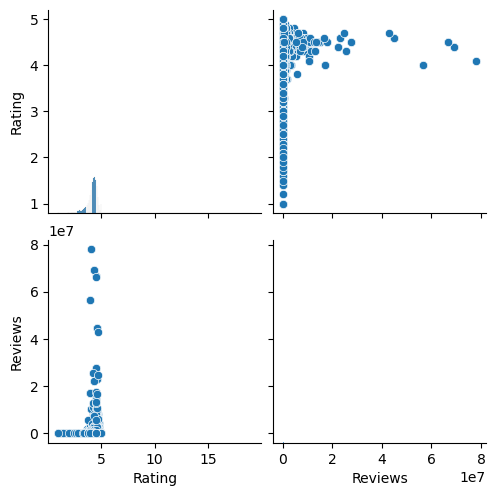

In [41]:
sns.pairplot(df2[['Rating', 'Reviews']])
"""Можно увидеть прямую зависимость между количеством рецензий и рейтингом приложения"""